# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import pylab


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_combine = pd.merge(study_results,mouse_metadata, how = "outer", on = ["Mouse ID", 'Mouse ID'])

# Display the data table for preview
                         
mouse_combine.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.

mice_number = len(mouse_combine['Mouse ID'].unique())
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ID = mouse_combine[mouse_combine.duplicated(['Mouse ID', 'Timepoint'])]

duplicate_mouse_ID["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_all = mouse_combine[mouse_combine['Mouse ID'] == 'g989']

duplicate_mouse_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_clean_df = mouse_combine[mouse_combine['Mouse ID'] != 'g989']

mouse_clean_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.

len(mouse_clean_df["Mouse ID"].unique())


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = mouse_clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = mouse_clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor = mouse_clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
Stdev_tumor = mouse_clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM_tumor = mouse_clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


summary_stats_tumor = pd.DataFrame({ "Mean Tumor Volume" : mean_tumor,
                                    "Median Tumor Volume" : median_tumor,
                                    "Tumor Volumen Variance" : variance_tumor,
                                    "Tumor Volume St.Dev." : Stdev_tumor,
                                    "Standard error Tumor Volume" : SEM_tumor,
})


summary_stats_tumor


,Mean Tumor Volume,Median Tumor Volume,Tumor Volumen Variance,Tumor Volume St.Dev.,Standard error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

mouse_clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ['mean', 'min','max', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean        min        max       std       sem
Drug Regimen                                                             
Capomulin             40.675741  23.343598  48.158209  4.994774  0.329346
Ceftamin              52.591172  45.000000  68.923185  6.268188  0.469821
Infubinol             52.884795  36.321346  72.226731  6.567243  0.492236
Ketapril              55.235638  45.000000  78.567014  8.279709  0.603860
Naftisol              54.331565  45.000000  76.668817  8.134708  0.596466
Placebo               54.033581  45.000000  73.212939  7.821003  0.581331
Propriva              52.320930  45.000000  72.455421  6.622085  0.544332
Ramicane              40.216745  22.050126  47.622816  4.846308  0.320955
Stelasyn              54.233149  45.000000  75.123690  7.710419  0.573111
Zoniferol             53.236507  45.000000  73.324432  6.966589  0.516398

## Bar and Pie Charts

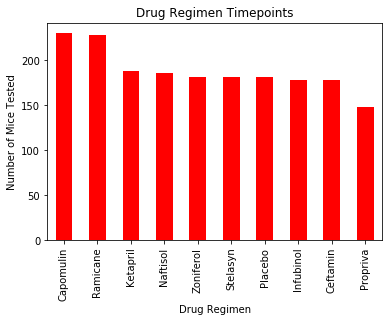

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_count = mouse_clean_df.groupby(["Drug Regimen"]).count()

drug_count_sorted = drug_count["Timepoint"].sort_values(ascending = False).plot(kind = 'bar', color = 'red')

drug_count_sorted

plt.title("Drug Regimen Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()



<function matplotlib.pyplot.show(*args, **kw)>

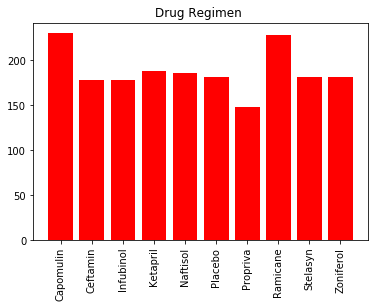

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(drug_count))

ticks = [i for i in x_axis]

drug_list = drug_count.index.tolist()

plt.bar(x_axis, drug_count["Timepoint"], color = "red", align = "center")
plt.xticks(ticks, drug_list, rotation = "vertical" )

plt.title('Drug Regimen ')
plt.show


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_gender = mouse_clean_df.groupby(['Sex']).count()["Mouse ID"]
mouse_gender = mouse_gender.reset_index()


#use this for the pie plots
mouse_gender


,Sex,Mouse ID
0,Female,922
1,Male,958


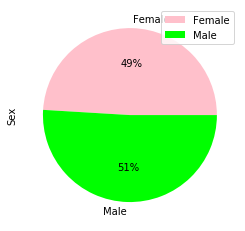

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_gender = mouse_clean_df.groupby(['Sex']).count()["Mouse ID"]
mouse_gender = mouse_gender.reset_index()

mouse_gender


labels = mouse_gender['Sex']

colors = ["pink", "lime"]

mouse_plot = mouse_gender.plot(kind = 'pie',
                               y = "Mouse ID", 
                  
                              autopct = '%1.0f%%',
                              labels = labels, 
                              colors = colors, 
                              startangle = 0)

mouse_plot.set_ylabel("Sex")
                  

plt.show()




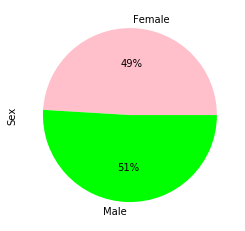

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = mouse_gender['Sex']
mice_id = mouse_gender["Mouse ID"]
colors = ["pink", "lime"]

plt.pie(mice_id, labels = mice_sex, colors = colors, autopct = '%1.0f%%', startangle = 0)


#pylab was used to set the label for y-axis
pylab.ylabel('Sex')



plt.show()




## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouse_drugs = mouse_clean_df[mouse_clean_df["Drug Regimen"].isin(
    ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]


mouse_drugs
# Start by getting the last (greatest) timepoint for each mouse


mouse_timepoint = mouse_drugs.groupby(['Mouse ID']).max()['Timepoint']

mouse_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume = pd.merge(mouse_timepoint, mouse_drugs, on = ('Mouse ID', 'Timepoint')) 

tumor_volume



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_size = []

for drug in treatments:
    
    tumorsize = tumor_volume.loc[tumor_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    tumor_size.append(tumorsize)
    
   
    
    
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tumorsize.quantile([.25,.5,.75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    iqr = upper - lower
    
   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    lowerbounds = lower - (1.5*iqr)
    upperbound = upper + (1.5*iqr)
    
    outliers = tumorsize.loc[(tumorsize < lowerbounds) | (tumorsize>upperbound)]

    print(f"{drug} potential outliers: {outliers}")
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


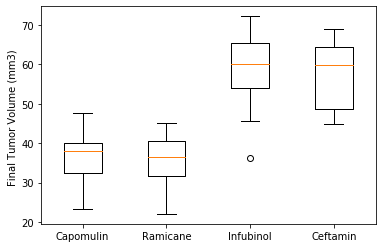

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3) ")

ax.boxplot(tumor_size, labels = treatments)
plt.show()


## Line and Scatter Plots

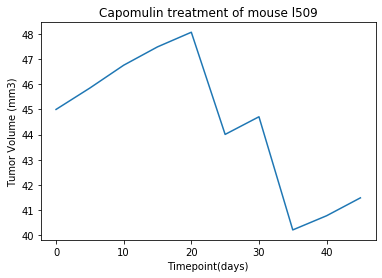

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
scatter_capomulin = mouse_drugs[mouse_drugs['Mouse ID']== 'l509']

plt.plot(scatter_capomulin["Timepoint"], scatter_capomulin['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


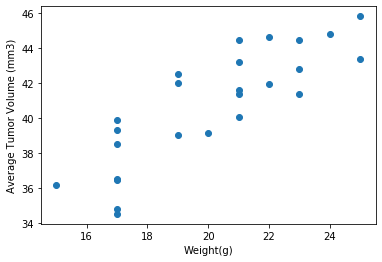

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = mouse_drugs[mouse_drugs["Drug Regimen"]=="Capomulin"]

avg_mousetumor = capomulin_df.groupby(["Mouse ID"]).mean()

avg_mousetumor = avg_mousetumor[['Tumor Volume (mm3)', 'Weight (g)']]



plt.scatter(avg_mousetumor['Weight (g)'],avg_mousetumor['Tumor Volume (mm3)'] )

plt.xlabel('Weight(g)')

plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


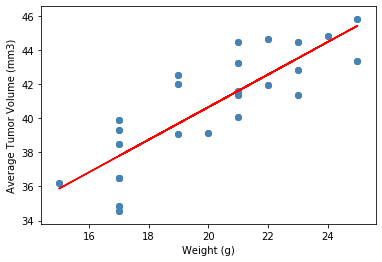

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


#extra dependency for linear regressions

from scipy.stats import linregress


#setting up x and y data points
avg_mousetumor = avg_mousetumor[["Tumor Volume (mm3)","Weight (g)"]]
tumor_volumemm3 = avg_mousetumor.iloc[:,0]
weight = avg_mousetumor.iloc[:,1]

correlation = st.pearsonr(tumor_volumemm3,weight)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = avg_mousetumor['Weight (g)']
y_values = avg_mousetumor['Tumor Volume (mm3)']


#plotting linear regression

plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values , color = "steelblue")
plt.plot(x_values,regress_values,"r-")
plt.show()